In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import make_scorer

pd.set_option('display.max_columns', None)

In [20]:
df = pd.read_csv('../data/final_df.csv').drop('Unnamed: 0', axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3475016 entries, 0 to 3475015
Data columns (total 23 columns):
 #   Column            Dtype  
---  ------            -----  
 0   LCLid             object 
 1   energy_sum        float64
 2   temperatureMax    float64
 3   windBearing       int64  
 4   cloudCover        float64
 5   windSpeed         float64
 6   humidity          float64
 7   moonPhase         float64
 8   acorn             object 
 9   bedrooms          float64
 10  house_value       float64
 11  no_of_children    float64
 12  tot_ppl           float64
 13  employment        object 
 14  family_structure  object 
 15  savings           object 
 16  house_type        object 
 17  day_time_minutes  int64  
 18  date_year         int64  
 19  date_month        int64  
 20  date_day          int64  
 21  is_holiday        int64  
 22  season            object 
dtypes: float64(10), int64(6), object(7)
memory usage: 609.8+ MB


In [24]:
df.drop('LCLid', axis=1, inplace=True)

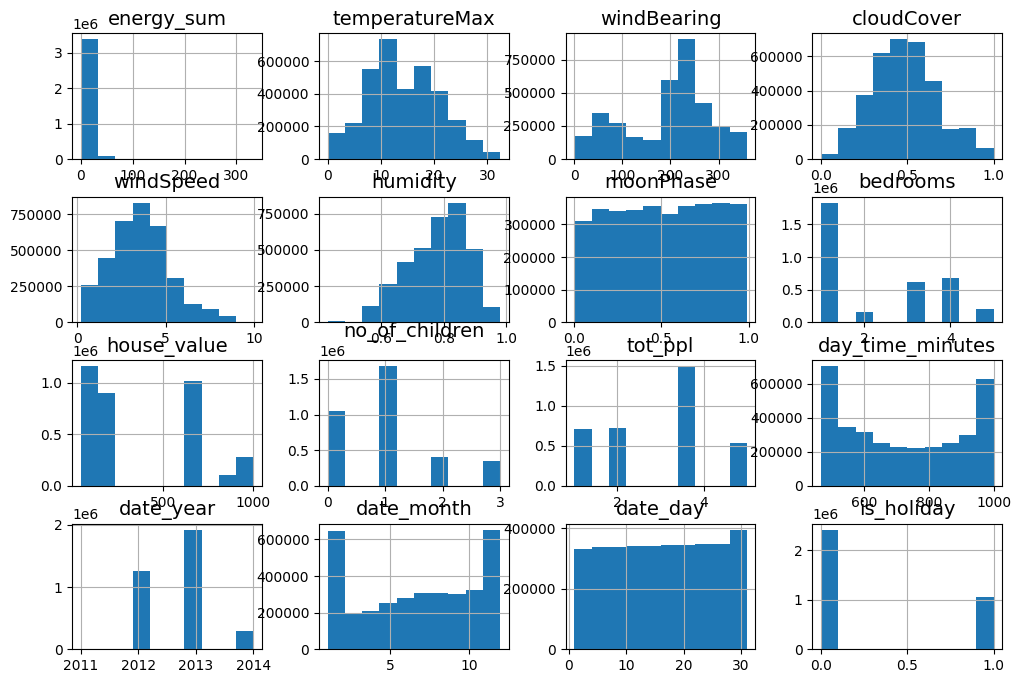

In [5]:
# checking distribution of data
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=10, figsize=(12, 8))
plt.show()

<Axes: >

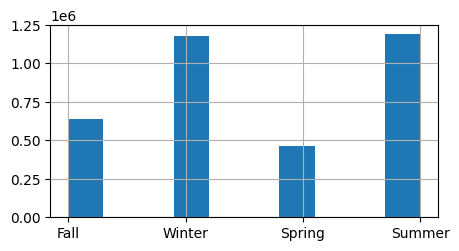

In [29]:
df['season'].hist(figsize=(5,2.5))

<Axes: >

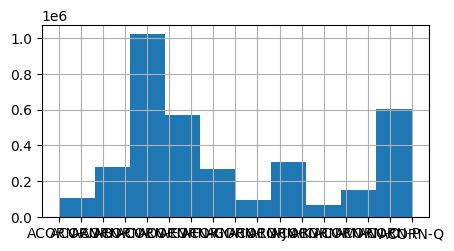

In [30]:
df['acorn'].hist(figsize=(5,2.5))

# Test train split

We are going to strategically split test and train data on acorn and season

In [43]:
X = df.loc[:, df.columns != 'energy_sum']
y = df['energy_sum']

In [54]:
# creating a combination of season and acorn columns
df['strat_col'] = df['season'] + '_' + df['acorn']

sss = StratifiedShuffleSplit(test_size = 0.2, n_splits=2, random_state=4)


In [59]:
for train_index, test_index in sss.split(df, df['strat_col']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

<Axes: >

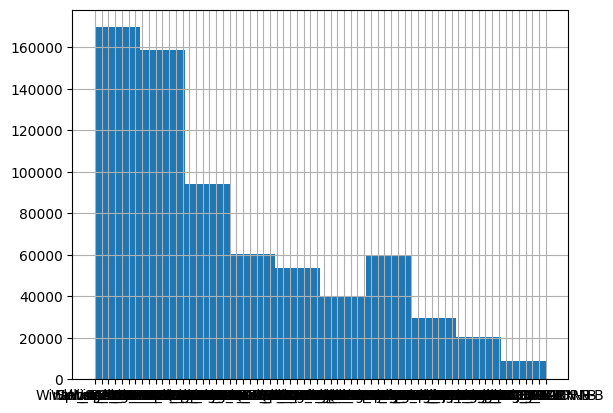

In [62]:
strat_test_set['strat_col'].hist()

<Axes: >

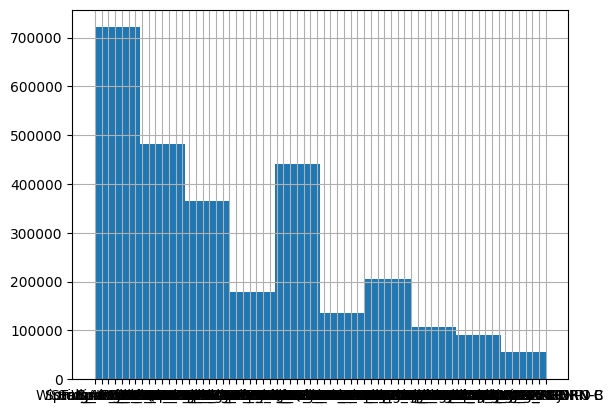

In [63]:
strat_train_set['strat_col'].hist()